<a href="https://colab.research.google.com/github/arthurweslen/PowerQuery_DAX/blob/main/DAX/d_Calendario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tabela d_Calendario com as colunas:

• Date <br>
• Ano<br>
• Mês Numeral<br>
• Mes Nome<br>
• Trimestre<br>
• Trimestre/Ano<br>
• Trimestre_NUM<br>
• ano.mes<br>
• ordem ano.mes<br>
• Trimestre Abreviado<br>
• ID Data


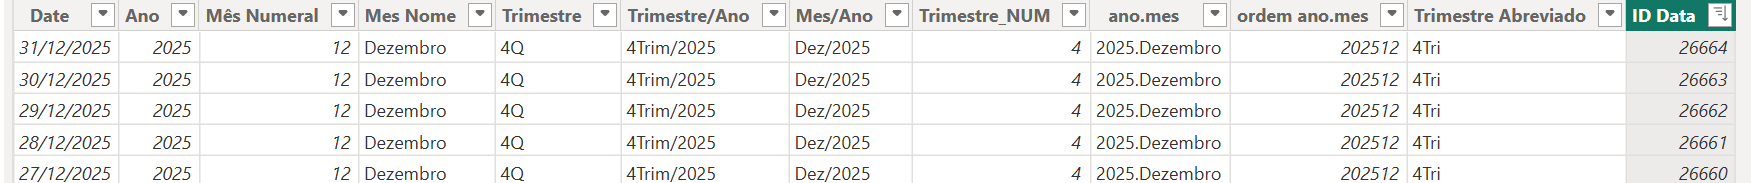

## Passo a Passo d_Calendario

**d_Calendario**  
```
= CALENDARAUTO()
```

**Ano**
```
= YEAR(d_Calendario[Date])
```

**Mês Numeral**
```
= MONTH(d_Calendario[Date])
```

**Mes Nome**
```
=
UPPER(LEFT(FORMAT(d_Calendario[Date], "mmmm"), 1)) &
LOWER(MID(FORMAT(d_Calendario[Date], "mmmm"), 2, LEN(FORMAT(d_Calendario[Date], "mmmm")) - 1))
```

**Trimestre**
```
= CONCATENATE(QUARTER(d_Calendario[Date]),"Q")
```

**Trimestre/Ano**
```
=
QUARTER(d_Calendario[Date]) &
"Trim/" &
d_Calendario[Ano]
```

**Mes/Ano**
```
=
UPPER(LEFT(FORMAT(d_Calendario[Date], "mmm"), 1)) &
MID(FORMAT(d_Calendario[Date], "mmm"), 2, 2) &
"/" & d_Calendario[Ano]
```

**Trimestre_NUM**  
```
= QUARTER(d_Calendario[Date])
```

**ano.mes**
```
= d_Calendario[Ano]&"."& d_Calendario[Mes Nome]
```

**ordem ano.mes**
```
= d_Calendario[Ano] & FORMAT(d_Calendario[Mês Numeral], "00")
```

**Trimestre Abreviado**
```
= QUARTER(d_Calendario[Date])&"Tri"
```


**ID Data**
```
=
RANKX(
    ALL(d_Calendario[Date]), -- Remove qualquer filtro de contexto sobre a coluna Date, garantindo que todas as datas da tabela sejam consideradas
    d_Calendario[Date],-- Define que o ranking será baseado na própria coluna Date
    ,
    ASC, -- Ordena as datas em ordem crescente (do mais antigo para o mais recente)
    Dense  -- Usa o método DENSE, que garante que o índice seja sequencial (sem pular números mesmo se houver datas repetidas)
)
```

## TMDL

In [ ]:
createOrReplace

	/// Tabela de calendário criada através da calendarauto() para ganhar agilidade e simplicidade.
	table d_Calendario
		lineageTag: ea909e4b-c23d-42e0-ba36-d624f87ac025
		dataCategory: Time

		column Date
			isKey
			formatString: Short Date
			lineageTag: b111cbd5-2906-4f57-9c96-40a047b83773
			summarizeBy: none
			isNameInferred
			sourceColumn: [Date]

			annotation SummarizationSetBy = Automatic

			annotation UnderlyingDateTimeDataType = Date

		column Ano = YEAR(d_Calendario[Date])
			formatString: 0
			lineageTag: 84a9e61f-0719-4b2a-9e59-176342cef9bf
			summarizeBy: sum

			annotation SummarizationSetBy = Automatic

		column 'Mês Numeral' = MONTH(d_Calendario[Date])
			formatString: 0
			lineageTag: 7aa1085d-6c77-4188-91e2-c926fad041a8
			summarizeBy: sum

			annotation SummarizationSetBy = Automatic

		column 'Mes Nome' = ```

				UPPER(LEFT(FORMAT(d_Calendario[Date], "mmmm"), 1)) &
				LOWER(MID(FORMAT(d_Calendario[Date], "mmmm"), 2, LEN(FORMAT(d_Calendario[Date], "mmmm")) - 1))

				```
			lineageTag: 48432740-ff29-43e8-b228-bb5af1bb9ac4
			summarizeBy: none
			sortByColumn: 'Mês Numeral'

			annotation SummarizationSetBy = Automatic

		column Trimestre = CONCATENATE(QUARTER(d_Calendario[Date]),"Q")
			lineageTag: 1e8681aa-b2d7-416d-9b28-81ab5c470ef0
			summarizeBy: none

			annotation SummarizationSetBy = Automatic

		column Trimestre/Ano =

				QUARTER(d_Calendario[Date]) &
				"Trim/" &
				d_Calendario[Ano]
			lineageTag: 205c15d7-616c-49e5-8681-539dacda90a5
			summarizeBy: none

			annotation SummarizationSetBy = Automatic

		column Mes/Ano = ```

				UPPER(LEFT(FORMAT(d_Calendario[Date], "mmm"), 1)) &
				MID(FORMAT(d_Calendario[Date], "mmm"), 2, 2) &
				"/" & d_Calendario[Ano]

				```
			lineageTag: 7468bcc0-6f98-4484-bdeb-ac7afe04c645
			summarizeBy: none
			sortByColumn: 'ordem ano.mes'

			annotation SummarizationSetBy = Automatic

		column Trimestre_NUM = QUARTER(d_Calendario[Date])
			formatString: 0
			lineageTag: 167d11d1-a703-46fd-9caa-c38d5397ba2b
			summarizeBy: sum

			annotation SummarizationSetBy = Automatic

		column 'ano.mes' = d_Calendario[Ano]&"."& d_Calendario[Mes Nome]
			lineageTag: 18a64a43-8ff0-4f49-8d8c-91186473bdc8
			summarizeBy: none

			annotation SummarizationSetBy = Automatic

		column 'ordem ano.mes' = d_Calendario[Ano] & FORMAT(d_Calendario[Mês Numeral], "00")
			dataType: int64
			formatString: 0
			lineageTag: b5103970-ada8-4414-94ee-9768b4efb74e
			summarizeBy: sum

			annotation SummarizationSetBy = Automatic

		column 'Trimestre Abreviado' = QUARTER(d_Calendario[Date])&"Tri"
			lineageTag: 4dbbaab4-69b6-466d-bfa6-f04aa15224c3
			summarizeBy: none

			annotation SummarizationSetBy = Automatic

		column 'ID Data' = ```

				RANKX(
				    ALL(d_Calendario[Date]), -- Remove qualquer filtro de contexto sobre a coluna Date, garantindo que todas as datas da tabela sejam consideradas
				    d_Calendario[Date],-- Define que o ranking será baseado na própria coluna Date
				    ,
				    ASC, -- Ordena as datas em ordem crescente (do mais antigo para o mais recente)
				    Dense  -- Usa o método DENSE, que garante que o índice seja sequencial (sem pular números mesmo se houver datas repetidas)
				)

				```
			formatString: 0
			lineageTag: 11ee0971-0824-4272-8363-58b2355387e8
			summarizeBy: sum

			annotation SummarizationSetBy = Automatic

		partition d_Calendario-81851fe2-6928-4ffe-9639-5a6168e82593 = calculated
			mode: import
			source =

					CALENDARAUTO()

		annotation PBI_Id = 72ba5210fafe4e518b81e311c2f37d7d

